**Data Visualization Suicide Rates Overview**
useing WordCloud, mapplo, seaborn and plotly
*my first work sorry for my mistakes ☺☺♥♥*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import numpy as np
import pycountry

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['master.csv']


In [2]:
# read data and write first 5 component
dataset = pd.read_csv("../input/master.csv")
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
#information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


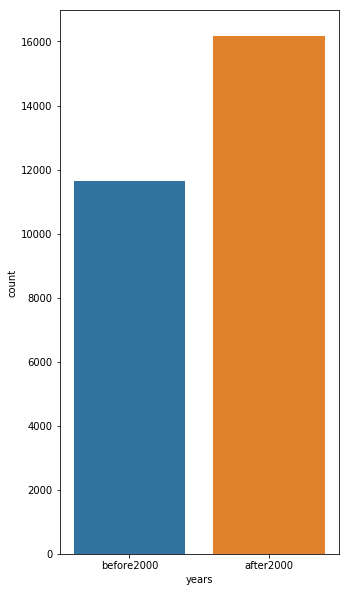

In [4]:
# Number of suicide before and after 2000
years = ["after2000" if i >= 2000 else "before2000" for i in dataset.year]
yearsd = pd.DataFrame({"years":years})
x = plt.figure(figsize=(5,10))
sns.countplot(yearsd.years)
plt.show()

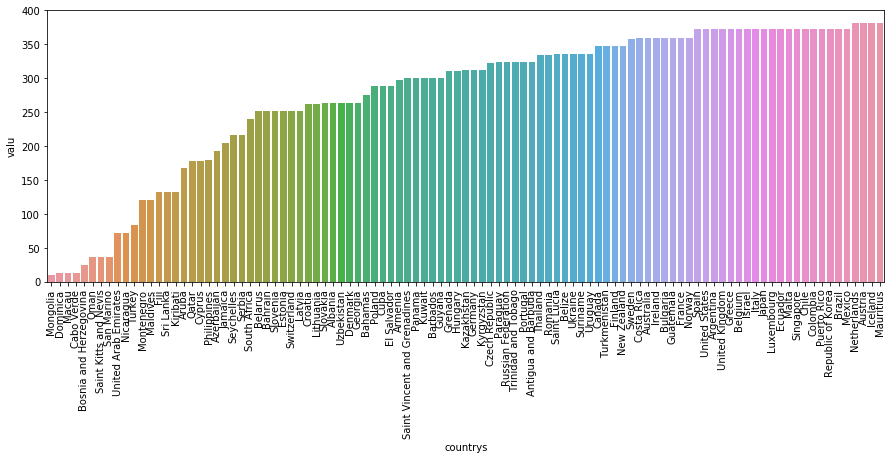

In [5]:
#Suicides rates by countries
countries = list(dataset.country.unique())
numbers = {}
for i in countries:
    numbers[i] = 0
for i in dataset.country:
    numbers[i] += 1

data_by_countries = pd.DataFrame({"countrys":list(numbers.keys()),"valu":list(numbers.values())})
gec = (data_by_countries["valu"].sort_values(ascending = True)).index.values
data_by_countries= data_by_countries.reindex(gec)
plt.figure(figsize = (15,5))
ax = sns.barplot(x = data_by_countries.countrys,y = data_by_countries.valu)
plt.xticks(rotation = 90)
plt.show()

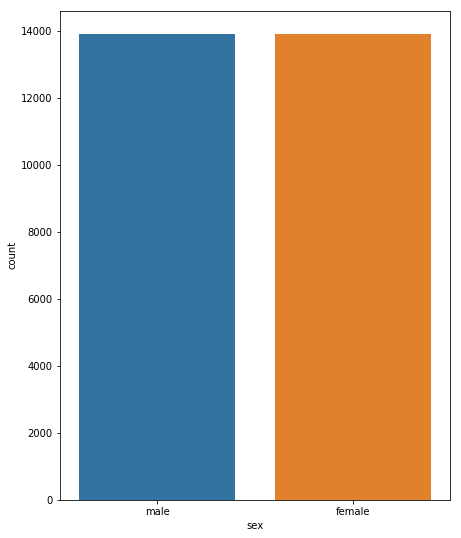

In [6]:
#suicide rates by gender
x1 = plt.figure(figsize =(7,9))
sns.countplot(dataset.sex)
plt.show()

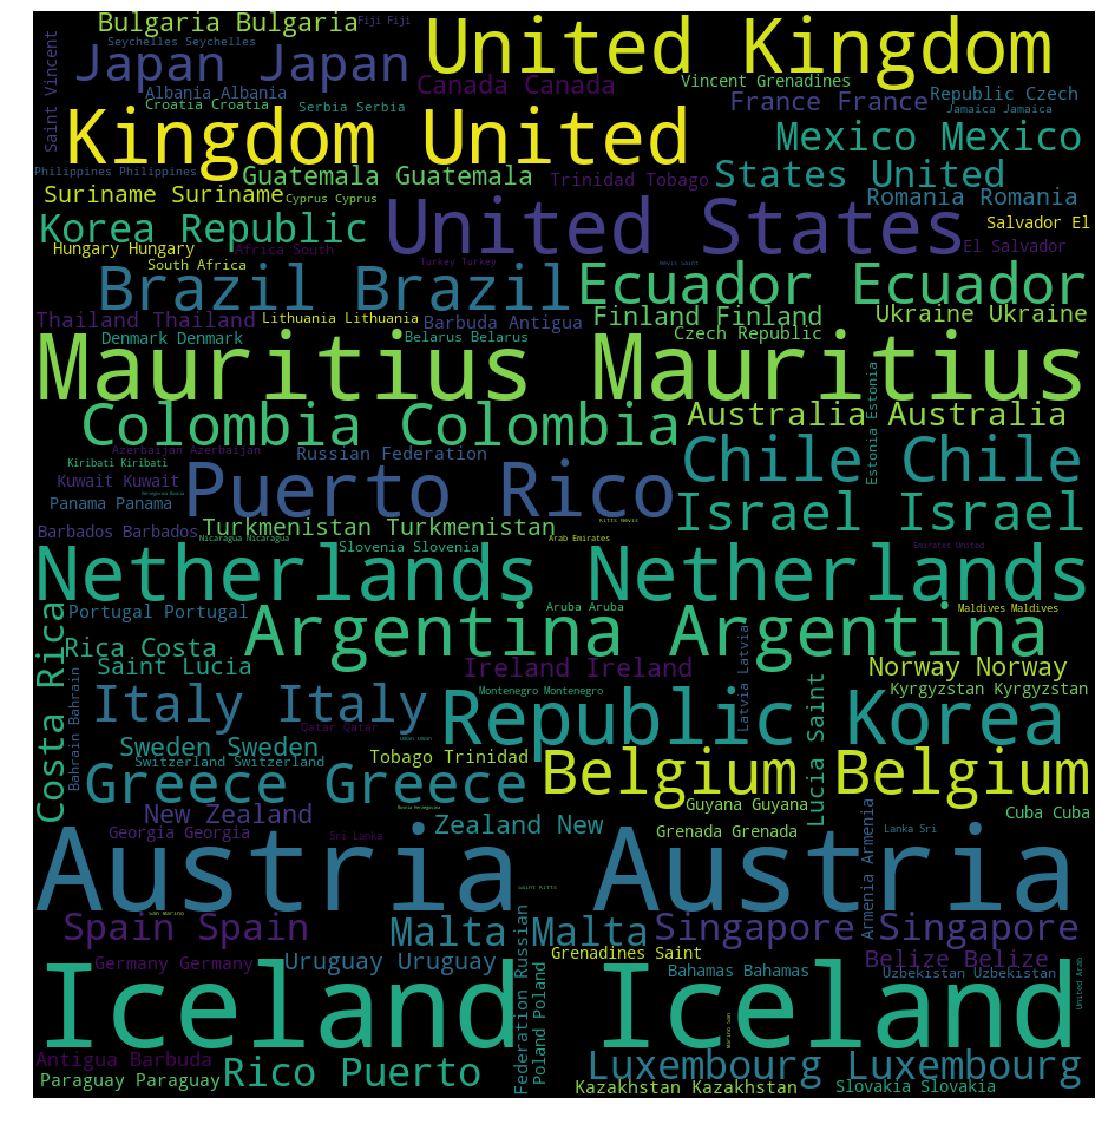

In [7]:
#suicide rates by country with wordcloud
plt.subplots(figsize = (20,20))
wordcloud = WordCloud(
        background_color= "black",
        width=900,
        height=922
        ).generate(" ".join(dataset.country))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
#3 stages to show suicide rates on the world map
# first stage conver country names to country ids alpha3
alphas = list()
for j in countries:
    for i in pycountry.countries:
        if j == i.name:
            alphas.append(i.alpha_3)
# some incorrect datas fixes
alphas.insert(17,"CPV")
alphas.insert(54,"MAC")
alphas.insert(73,"KOR")
alphas.insert(78,"VCT")
# second stage data preparation for the world map
frame = {"alphas":alphas,"counts":list(numbers.values())}
dataWorldMap = pd.DataFrame(frame)
#last stage plotting a world map
data = [ dict(
        type='choropleth',
        colorscale = "Reds",
        autocolorscale = False,
        locations = dataWorldMap.alphas,
        z = dataWorldMap.counts,
        text = countries,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Count")
        ) ]

layout = dict(
        title = "Suicides Counts with World Map",
        geo = dict(
            showcountries = True,
            countrycolor = "rgb(10,10,10)",
            
            scope='world',
            projection=dict( type='mercator' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig )


In [9]:
#National Gross Domestic Product for years with mapplot animations
# first prepare the data according to the requirements
years1 = dataset.year.unique()
years1 = np.sort(years1)
dataWorldMap["country"] = dataset.country.unique()
data_for_gdp = dataset.loc[:,["country","year"]]
gdp = list()
for i in range(len(dataset[" gdp_for_year ($) "])):
    gdp.append(dataset[" gdp_for_year ($) "].iloc[i].replace(",",""))
    gdp[i] = gdp[i][:-6]
data_for_gdp[" gdp_for_year ($) "] = gdp
data_for_gdp[" gdp_for_year ($) "] = data_for_gdp[" gdp_for_year ($) "].astype(int)
data_for_gdp = data_for_gdp.drop_duplicates()
alph = list()
for i in data_for_gdp.country:
    alph.append(dataWorldMap.alphas[dataWorldMap.country == i].iloc[0])
data_for_gdp["alphas"] = alph
# and plotting worldmap animations
years = [str(each) for each in list(dataset.year.unique())]  


# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

figure['layout']['geo'] = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, 
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1965',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
year = 1695
# make frames

data_dict = dict(
         type='choropleth',
         colorscale = "Reds",
         autocolorscale = False,
         locations = data_for_gdp.alphas,
         z = data_for_gdp[" gdp_for_year ($) "],
         text = data_for_gdp.country,
         marker = dict(
                 line = dict (
                         color = 'rgb(255,255,255)',
                         width = 2
                      ) ),
                 colorbar = dict(
                      title = "Count")
      ) 
figure['data'].append(data_dict)
for year in years1:
    frame = {'data': [], 'name': str(year)}
    data_by_year = data_for_gdp[data_for_gdp['year'] == int(year)]
    data_dict = dict(
           type='choropleth',
           colorscale = "Reds",
           autocolorscale = False,
           locations = data_by_year.alphas,
           z = data_by_year[" gdp_for_year ($) "],
           text = data_by_year.country,
           marker = dict(
                   line = dict (
                           color = 'rgb(255,255,255)',
                           width = 2
                           ) ),
                   colorbar = dict(
                           title = "Count")
        ) 
    frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': str(year),
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)


figure["layout"]["autosize"]= True
figure["layout"]["title"] = "Gross Domestic Product for Year (M Dollar)"       

figure['layout']['sliders'] = [sliders_dict]

iplot(figure)

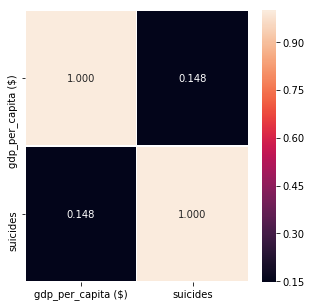

In [10]:
#Corralation between gdp per capita and suicide amounts with heatmap
data_corr = dataset.loc[:,["country","gdp_per_capita ($)"]]
data_corr = data_corr.groupby("country").mean()
data_corr["suicides"] = list(numbers.values())

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data_corr.corr(),annot=True,linewidths=0.5,fmt=".3f",ax=ax)
plt.show()

In [11]:
#Gdp for year and gpd per capita ratios of countries in 2013 
data2013 = dataset[dataset.year == 2013]
data2013 = data2013.loc[:,["country"," gdp_for_year ($) ","gdp_per_capita ($)"]]
gdp = list()
for i in range(len(data2013[" gdp_for_year ($) "])):
    gdp.append(data2013[" gdp_for_year ($) "].iloc[i].replace(",",""))
    gdp[i] = gdp[i][:-8]
data2013[" gdp_for_year ($) "] = gdp
data2013[" gdp_for_year ($) "] = data2013[" gdp_for_year ($) "].astype(int)
data2013 = data2013.groupby("country").mean()
new_index = (data2013[" gdp_for_year ($) "].sort_values(ascending = False)).index.values
data2013 = data2013.reindex(new_index)
trace1 = go.Scatter(x = data2013.index,
                    y = data2013[" gdp_for_year ($) "],
                    mode = "lines",
                    name = " gdp for year 100M($) ",
                    marker = dict(color ="rgba(255,0,0,0.8)"),
                    text = data2013.index)
trace2 = go.Scatter(x = data2013.index,
                    y = data2013["gdp_per_capita ($)"],
                    mode = "lines",
                    name = " gdp per capita ($) ",
                    marker = dict(color ="rgba(0,255,0,0.8)"),
                    text = data2013.index)
data = [trace1,trace2]
layout = dict(title = "gdp per capita vs gdp for year in 2013",
              xaxis = dict(title = "Countrys",ticklen = 5,zeroline = True))
fig = dict(data = data, layout = layout)
iplot(fig)

In [12]:
#Gdp per capita rates of the first 8 countries in 2013 with piechard
new_index = (data2013["gdp_per_capita ($)"].sort_values(ascending = False)).index.values
data_per_capita = data2013.reindex(new_index)
piedata= data_per_capita.iloc[:8]
fig = {
       "data":[
               {
                 "values": piedata["gdp_per_capita ($)"],
                 "labels": piedata.index,
                 "domain":{"x":[0,0.5]},
                 "name":  "gdp per capita",
                 "hoverinfo":"label+percent+name",
                 "type":"pie"
                       },],
    "layout":{
            "title":"GDP per Capital",
            "annotations":[{
                    "font":{"size":20},
                    "showarrow": False,
                    "text": "Top 8 Country in 2013",
                    "x":0.20,
                    "y": 1
                    }]
            }
    }

iplot(fig)

In [13]:
#The first 20 countries in 2013 gdp for year and gdp per capita comparison with bubblechar
#suicide size entered in size
bubbledata = data2013.iloc[:20]
suicides = [numbers[i]/10 for i in bubbledata.index]
colors = [float(i) for i in suicides]
data = [
    {
        'y': bubbledata[" gdp_for_year ($) "],
        'x': bubbledata["gdp_per_capita ($)"],
        'mode': 'markers',
        'marker': {
            'color': colors,
            'size': suicides,
            'showscale': True
        },
        "text" :  bubbledata.index    
    }
]
iplot(data)
